In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt  
data=pd.read_csv(r"C:\Users\DELL\Downloads\Ediglobe_Minor_Project\employe.csv")

1) What is the current workforce size, and how many employees have already left the organization?

In [54]:
count_still_working=data[data["left"]==0].shape[0]
print("Current workforce of the organization is:",count_still_working)
count_left=data[data["left"]==1].shape[0]
print("Number of employees who have already let the organization:",count_left)

Current workforce of the organization is: 11428
Number of employees who have already let the organization: 3571


Key findings and verdict
* Current workforce is 11428 employees
* Number of employees who have already left is 3571

2) Which departments are experiencing the highest rates of attrition?

The distinct departments are ['sales' 'accounting' 'hr' 'technical' 'support' 'IT' 'product_mng'
 'marketing' 'management' 'RandD']


The attrition rates for the following departments are:-
sales:24.49
accounting:26.60
hr:29.09
technical:25.62
support:24.90
IT:22.25
product_mng:21.95
marketing:23.66
management:14.44
RandD:15.37


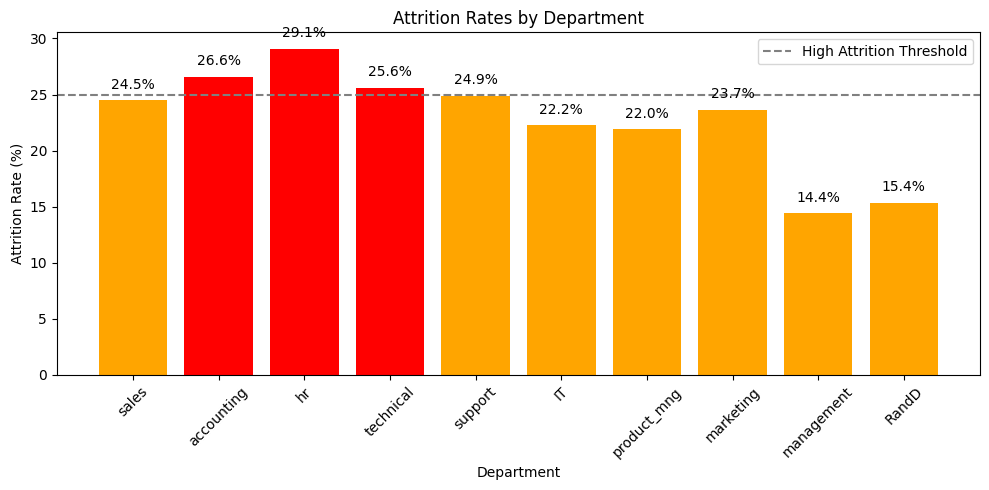

In [ ]:
'''list_dept=data["dept"].unique()
print("The distinct departments are",list_dept)
left_emp=data[data["left"]==1]
dept_count=left_emp["dept"].value_counts().reset_index()
#check for reset_index vs to_frame
#value_counts() functions turns a dataframe to a series, and while plotting we cant use data as series, hence we have to turn it back to dataframe
print(dept_count)
max_row = dept_count.loc[dept_count['count'].idxmax()]
print(f"Department with the highest number of people left: {max_row['dept']} ({max_row['count']} people)")
sns.countplot(x='dept',data=left_emp)
plt.title("Number of people left VS the department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()'''

'''#Using barplot
dept_count.columns=['dept','count']
#columns is an attribute of a dataframe, not a series
sns.barplot(x='dept',y='count',data=dept_count)
plt.show()'''


list_dept=data["dept"].unique()
print("The distinct departments are",list_dept)
left_emp=data[data["left"]==1]
print("\n")

# Initialize the plot
plt.figure(figsize=(10, 5))
plt.title("Attrition Rates by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Rate (%)")

#evaluate attrition rates for each department
print("The attrition rates for the following departments are:-")
for x in list_dept:
    n_total_dept=data[data["dept"]==x].shape[0]
    n_left_dept=left_emp[left_emp["dept"]==x].shape[0]
    attrition=(n_left_dept/n_total_dept)*100
    print(f"{x}:{attrition:0.2f}")
    
    #print each bar on the plot inside the loop
    plt.bar(x, attrition, color='red' if attrition > 25  else 'orange')
    #print values on top of each bar
    plt.text(x, attrition + 1, f"{attrition:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.axhline(y=25, color='gray', linestyle='--', label='High Attrition Threshold')
plt.legend()
plt.tight_layout()
plt.show()
    


Key findings
* The attriton rates of all the departments have been displayed, and it is seen that the attrition rates of HR department is the highest of all at 29.1%, followed by Accounting deartment at 26.6% and then third highest being Technical department at 25.6%.
* A bar graph has been displayed showing the attrition rates of all departrments, and 25% attrition has been marked as the threshold attrition, and the departments above 25% attrition are Technical, HR and Accounting departments

Verdict
* HR Department has the highest rate of attrition at 29.1%
* Accounting department has the second highest rate of attrition at 26.6%
* Technical department has the third highest rate of attrition at 25.6%

3) Are employees working on fewer than 3 projects more likely to leave the company?

Attrition rate for employees with projects fewer than 3 is: 65.61976549413735
Attrition rate for employees with projects NOT fewer than 3 is: 15.89088890651019


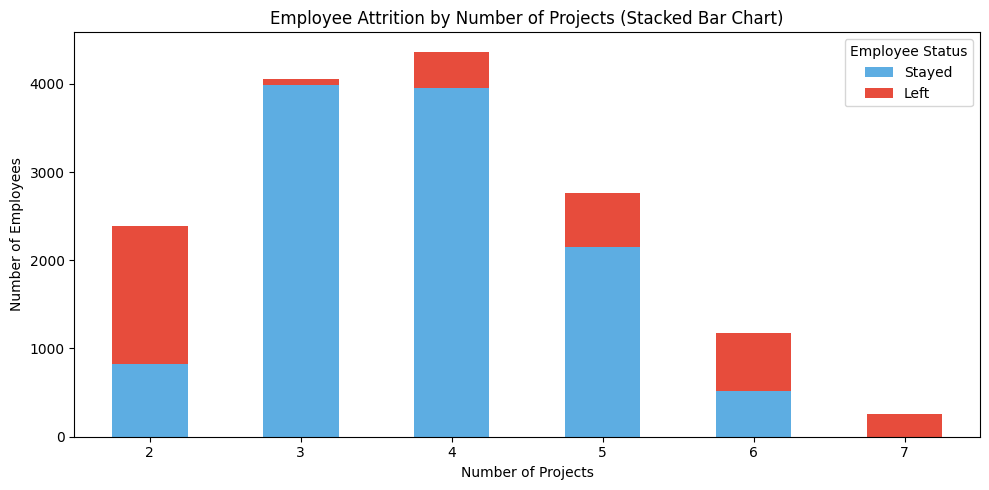

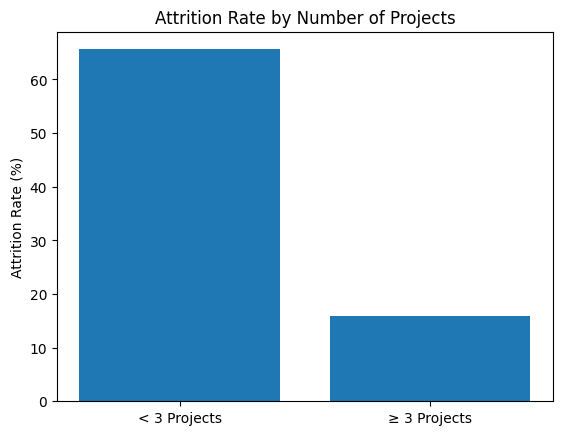

In [ ]:
project_lessthan3=data[data["numberOfProjects"]<3]
number_project_lessthan3=project_lessthan3.shape[0]
left_project_lessthan3=project_lessthan3[project_lessthan3["left"]==1].shape[0]
attrition1=(left_project_lessthan3/number_project_lessthan3)*100
print("Attrition rate for employees with projects fewer than 3 is:",attrition1)  #for project less than 3

project_morethan3=data[data["numberOfProjects"]>=3]
number_project_morethan3=project_morethan3.shape[0]
left_project_morethan3=project_morethan3[project_morethan3["left"]==1].shape[0]
attrition2=(left_project_morethan3/number_project_morethan3)*100
print("Attrition rate for employees with projects NOT fewer than 3 is:",attrition2)  #for project not less than 3


#first we will plot a graph for all the project groups, where we will highlight both left and stayed in the total bar for each project group
#which will make it easier to visualize the ratio of left/total for both <3 and >=3
grouped = data.groupby(['numberOfProjects', 'left']).size().unstack(fill_value=0)
# Rename columns for clarity
grouped.columns = ['Stayed', 'Left']
# Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#5DADE2', '#E74C3C'])
# Labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Employee Attrition by Number of Projects (Stacked Bar Chart)')
plt.legend(title='Employee Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#now lets directly plot the bars for attrition rates for both project<3 and project>=3
plt.bar(['< 3 Projects', '≥ 3 Projects'], [attrition1, attrition2])
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Number of Projects')

plt.show()

#attrition rate for proj<3 = (no of employees who left and had proj<3) / (total employees with proj<3)

Key findings
* It is calculated that attrition rate of employees with fewer than 3 projects is 69.62%, and for those with projects NOT fewer than 3 is      15.89%. Therefore we can firmly say that employees with fewer than 3 projects are more likely to leave.
* Stacked bar chart is used to visualize both left and stayed employees for each number of project, and we can see that those working on less than 3 projects are very likely to leave and also those working on 5+ projects are also very likely to leave due to burnout.
* least likely to leave are those working on exactly 3 projects with lowest rate of attrition.
* A bar chart is used to visualize the attrition rates for employees with fewer than 3 projects and greater and equal to 3 peoject and it is clearly seen that attrition rate is way more for those with fewer than 3 projects


Verdict
* Yes, employees with fewer than 3 projects are more likely to leave.
* But also those with 5+ projects are very likely to leave, reason can be burnout
* The optimal number of projects for which the employees are staying is 3-4

4) How does the number of projects correlate with time spent at the company, particularly for those who have left?

Pearson Correlation: 0.602
P-value: 0.000

Interpretation: strong positive correlation


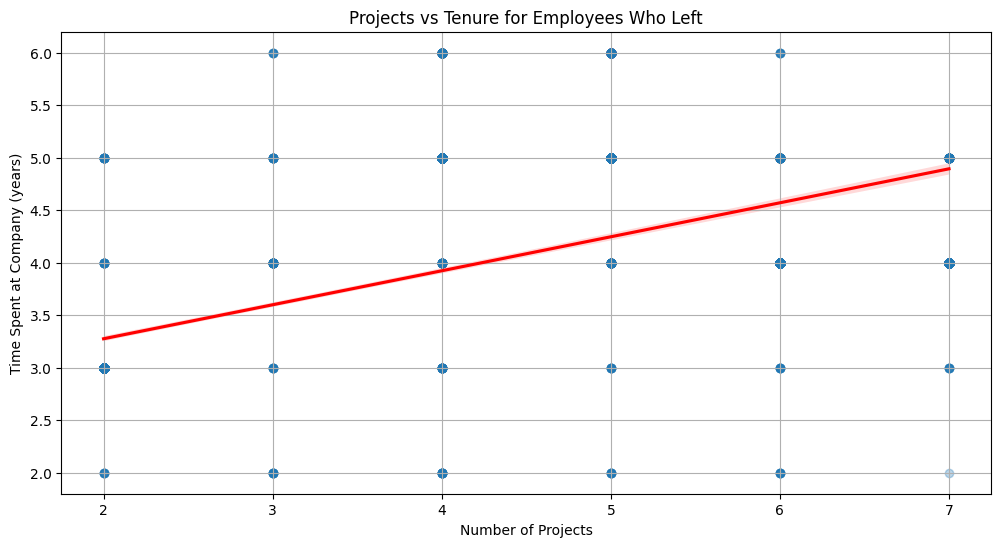

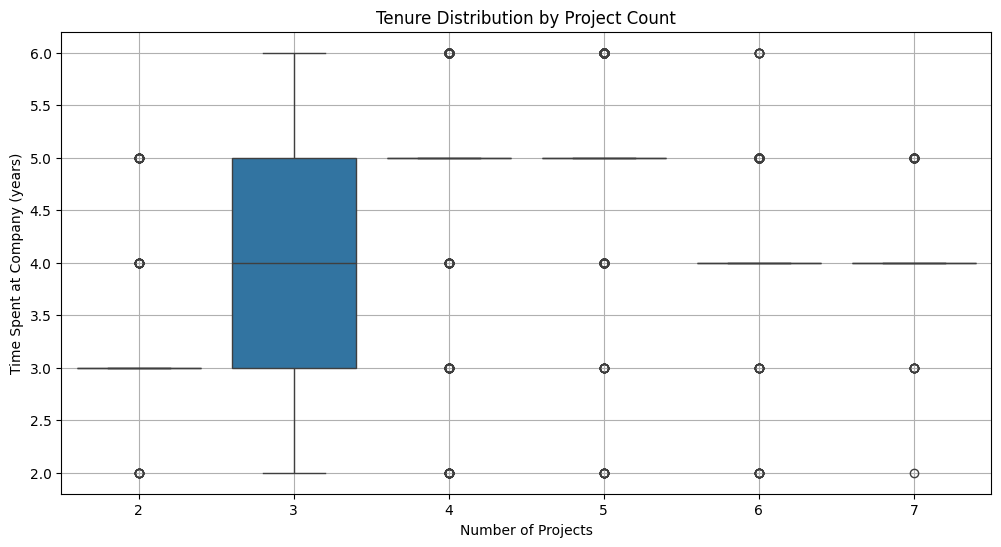


Average Tenure by Project Count:
numberOfProjects
2    3.027441
3    3.958333
4    4.899756
5    5.032680
6    4.087023
7    4.113281
Name: timeSpent.company, dtype: float64


In [ ]:
from scipy import stats
# Filter for employees who left
left_emp = data[data['left'] == 1]

# Calculate correlation
pearson_corr, p_value = stats.pearsonr(left_emp['numberOfProjects'], left_emp['timeSpent.company'])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if abs(pearson_corr) > 0.5:
    strength = "strong"
elif abs(pearson_corr) > 0.3:
    strength = "moderate"
else:
    strength = "weak"

if pearson_corr > 0:
    direction = "positive"
else:
    direction = "negative"

print(f"\nInterpretation: {strength} {direction} correlation")
# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.regplot(x='numberOfProjects', y='timeSpent.company', data=left_emp,scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Projects vs Tenure for Employees Who Left')
plt.xlabel('Number of Projects')
plt.ylabel('Time Spent at Company (years)')
plt.grid(True)

# Boxplot to show distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='numberOfProjects', y='timeSpent.company', data=left_emp)
plt.title('Tenure Distribution by Project Count')
plt.xlabel('Number of Projects')
plt.ylabel('Time Spent at Company (years)')
plt.grid(True)

plt.show()

# Additional analysis: Average tenure by project count
avg_tenure = left_emp.groupby('numberOfProjects')['timeSpent.company'].mean()
print("\nAverage Tenure by Project Count:")
print(avg_tenure)

Key findings are:
* There is a general upward slope in the regression line shown in the scatter plot, which signifies that the more the projects with an employee, the longer he would work for the company
* We displayed the box plot for mean tenures for each project number which also shows a slight upward pattern, but aroun 5+ projects the mean tenure slightly falls signifying that people might leave due to burnout and would work for less time
* the mean tenure is separately printed too for each number of project, we see a clear upward trend till 5 projects, but after that there is a downward trend which again might signify burnout which are causing employees to work for less time and then leave.


The optimal solution is:
* 4-5 projects appears to be the "sweet spot" for retention—engaging but not overwhelming.
* 6+ projects led to earlier attrition (~4 years), indicating potential burnout.

Verdict
* Yes, to some extent number of projects correlate with time spent at the company for those who have left, but this trend becomes irrelevant as employees with 6+ projects are also very likely to leave, due to potential burnout so there must be optimal number of projects assigned to every employee.

5) Could compensation levels be influencing an employee’s decision to leave?

['low' 'medium' 'high']
Attrition rate for low salary is: 29.68835429196282
Attrition rate for medium salary is: 20.431275209432208
Attrition rate for high salary is: 6.628940986257073


Chi-square p-value: 0.0000000000
Significant (salary affects attrition)? YES


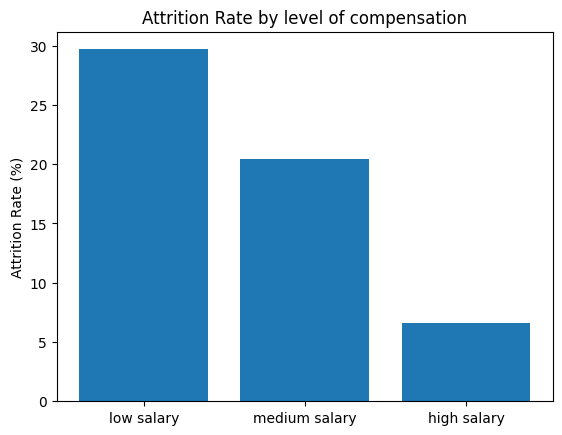

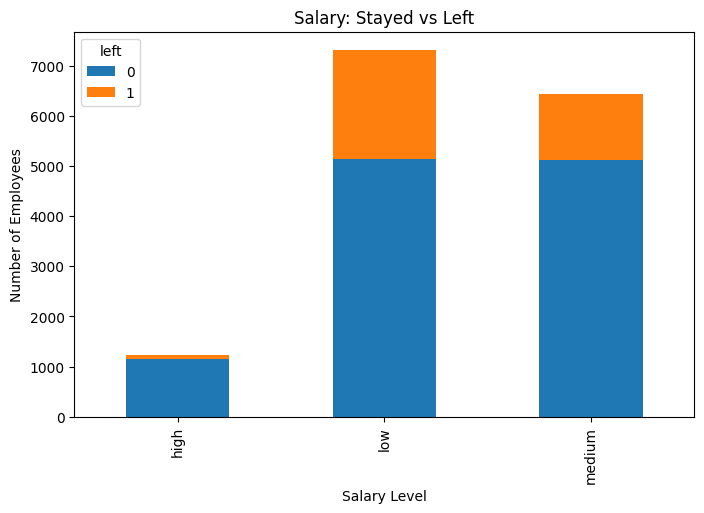

In [108]:
#using data split
left_emp = data[data['left'] == 1]
print(data["salary"].unique())
n_low=data[data["salary"]=="low"].shape[0]
n_medium=data[data["salary"]=="medium"].shape[0]
n_high=data[data["salary"]=="high"].shape[0]
#.shape[0] picks up just the number of rows that we need, as shape has format of [rows, columns]

n_low_left=left_emp[left_emp["salary"]=="low"].shape[0]
n_medium_left=left_emp[left_emp["salary"]=="medium"].shape[0]
n_high_left=left_emp[left_emp["salary"]=="high"].shape[0]

attrition_low=(n_low_left/n_low)*100
attrition_medium=(n_medium_left/n_medium)*100
attrition_high=(n_high_left/n_high)*100

print("Attrition rate for low salary is:",attrition_low)
print("Attrition rate for medium salary is:",attrition_medium)
print("Attrition rate for high salary is:",attrition_high)
print("\n")



#using chi square
from scipy.stats import chi2_contingency
# Create a contingency table: salary vs. left
contingency_table = pd.crosstab(data['salary'], data['left'])
# Run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p_value:.10f}")
print("Significant (salary affects attrition)?" , "YES" if p_value < 0.05 else "NO")



#bar plot for attrition rates at all salary levels
plt.bar(['low salary', 'medium salary','high salary'], [attrition_low, attrition_medium,attrition_high])
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by level of compensation')
plt.show()



#stacked bar chart for each compensation level showing both left and stayed employees
# Count employees by salary and left status
result = data.groupby(['salary', 'left']).size().unstack()
result.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Salary: Stayed vs Left')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()



Key findings
* It is calculated that attrition rates for compensations which are low:29.69%, medium:20.43%, high:6.63%, therefore lesser salary means more people leaving the company, hence a medium or a high salary should be given for the employees to stay.
* The strength of compensation levels affecting decision to leave is too strong and it can be seen as p-score is almost 0.0000
* Bar chart is used to clearly visualize the attrition rates for each salary level and it can be seen it is highest for low salary and very veryy low for high salary
* A stacked bar plot is used to visualize how many employees left and how many stayed for each compensation level, and it is clearly seen that the employees wiith low salary are more likely to leave compared to medium and high salary

Verdict
* Yes, compensation levels influence employees' decision to leave and that too at a very great extent, employees with low salary are very likely to leave, and employees with high salary are least likely to leave and that with medium salary have higher probability of leaving than high salary but lower than low salary